In [0]:
#import libraries

import os, shutil
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, MaxPooling2D, Conv2D, Dropout 
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
import numpy as np

In [0]:
#create subfolders for training, testing, and vakidation sets
#using small set to mimick real world setting where tens of thousands of data points is not always possible

original_dataset_dir = '~/Documents/Documents/train/'
base_dir = 'C:/Users/tnort/Documents/cats_and_dogs_small/'
#os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)



In [0]:
#copies first 1000 images to train, 500 to test, 500 to validation for dogs and cats

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [3]:
#Number of images per training, testing, and validation set

print('total training cat images:', len(os.listdir(train_cats_dir)), '\n',
      'total training dog images:', len(os.listdir(train_dogs_dir)), '\n',
      'total validation cat images:', len(os.listdir(validation_cats_dir)), '\n',
      'total validation dog images:', len(os.listdir(validation_dogs_dir)), '\n',
      'total test cat images:', len(os.listdir(test_cats_dir)), '\n',
      'total test dog images:', len(os.listdir(test_dogs_dir)), '\n'
      )

total training cat images: 1000 
 total training dog images: 1000 
 total validation cat images: 500 
 total validation dog images: 500 
 total test cat images: 500 
 total test dog images: 500 



In [4]:
#model blueprint, summary statistics, 3.4 million parameters

model_blueprint = Sequential()

model_blueprint.add(Conv2D(32,
                kernel_size = (3, 3),
                activation = 'relu',
                input_shape = (150, 150, 3)))
model_blueprint.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

model_blueprint.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model_blueprint.add(MaxPooling2D(pool_size = (2,2)))

model_blueprint.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
model_blueprint.add(MaxPooling2D(pool_size = (2,2)))

model_blueprint.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
model_blueprint.add(MaxPooling2D(pool_size = (2,2)))

model_blueprint.add(Flatten())
model_blueprint.add(Dense(512, activation = 'relu'))
model_blueprint.add(Dense(1, activation = 'sigmoid'))

model_blueprint.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
#defining convolutional neural network  

RMS = RMSprop(lr=1e-4)

def convolutional_model(model_name = str):
  model_name = Sequential()



  model_name.add(Conv2D(32,
                  kernel_size = (3, 3),
                  activation = 'relu',
                  input_shape = (150, 150, 3)))
  model_name.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

  model_name.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(MaxPooling2D(pool_size = (2,2)))

  model_name.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(MaxPooling2D(pool_size = (2,2)))

  model_name.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(MaxPooling2D(pool_size = (2,2)))

  model_name.add(Flatten())
  model_name.add(Dense(512, activation = 'relu'))
  model_name.add(Dense(1, activation = 'sigmoid'))



  model_name.compile(optimizer = RMS, loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model_name

In [6]:
#rescales all images by 1/255

def create_train_datagen():
  train_datagen = ImageDataGenerator(rescale = 1./255)
  return train_datagen

train_datagen = create_train_datagen()

def create_test_datagen():
  test_datagen = ImageDataGenerator(rescale = 1./255)
  return test_datagen

test_datagen = create_test_datagen()


#resizes all triaining images to 150 x 150
def create_train_generator(batch_size = int, target_size = (int, int), class_mode =  'binary' ):
  train_generator = train_datagen.flow_from_directory(
      train_dir,
      target_size = (150, 150),
      batch_size = 20,
      class_mode = 'binary')
  return train_generator

train_generator = create_train_generator(batch_size = 20, target_size = (150,150))


Found 2000 images belonging to 2 classes.


In [7]:
#resizes all validation images to 150 x 150
def create_validation_generator(batch_size = int, target_size = (int, int), class_mode = 'binary'):
  validation_generator = test_datagen.flow_from_directory(
      validation_dir,
      target_size = (150, 150),
      batch_size = 20,
      class_mode = 'binary')
  return validation_generator

validation_generator = create_validation_generator(20, (150,150))


Found 1000 images belonging to 2 classes.


In [8]:
#checking the shape of batches
for data_batch, labels_batch in train_generator:
  print('data batch shape : ', data_batch.shape, '\n',
        'labels batch shape : ', labels_batch.shape)
  break

data batch shape :  (20, 150, 150, 3) 
 labels batch shape :  (20,)


In [0]:
#Model fit function
def history(model = tf.keras.models.Sequential, steps_per_epoch = int, epochs = int, validation_steps = int): #takes model and three int parameters
  history = model.fit(train_generator,
                      steps_per_epoch=steps_per_epoch,
                      epochs=epochs,
                      validation_data=validation_generator,
                      validation_steps=validation_steps)
  return history

In [10]:
#fitting/training the neural network

model_one = convolutional_model('baseline_model')

history1 = history(model_one, 100, 30, 50)

Epoch 1/30
100/100 [==============================] - 7s 70ms/step - loss: 0.6898 - accuracy: 0.5355 - val_loss: 0.6831 - val_accuracy: 0.5340
Epoch 2/30
100/100 [==============================] - 7s 69ms/step - loss: 0.6564 - accuracy: 0.6180 - val_loss: 0.6509 - val_accuracy: 0.5920
Epoch 3/30
100/100 [==============================] - 7s 70ms/step - loss: 0.5983 - accuracy: 0.6810 - val_loss: 0.6147 - val_accuracy: 0.6600
Epoch 4/30
100/100 [==============================] - 7s 71ms/step - loss: 0.5635 - accuracy: 0.7170 - val_loss: 0.5869 - val_accuracy: 0.6930
Epoch 5/30
100/100 [==============================] - 7s 68ms/step - loss: 0.5341 - accuracy: 0.7370 - val_loss: 0.6612 - val_accuracy: 0.6440
Epoch 6/30
100/100 [==============================] - 7s 70ms/step - loss: 0.5091 - accuracy: 0.7455 - val_loss: 0.5984 - val_accuracy: 0.6840
Epoch 7/30
100/100 [==============================] - 7s 69ms/step - loss: 0.4758 - accuracy: 0.7755 - val_loss: 0.5789 - val_accuracy: 0.6980

In [0]:
#save model for later use
model_one.save('cat_dog_mini_one1.h5')

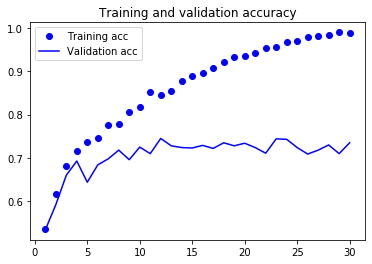

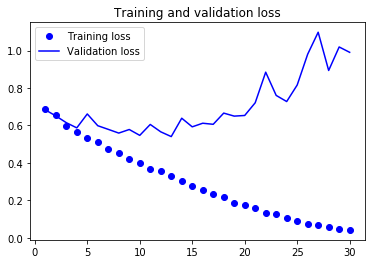

In [12]:
#Defining accuracy and loss graphs

import matplotlib.pyplot as plt


def acc_vloss(history_model = str):
  acc = history_model.history['accuracy']
  val_acc = history_model.history['val_accuracy']
  loss = history_model.history['loss']
  val_loss = history_model.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()
  
acc_vloss(history1)

In [0]:
#model is overfitting badly
#setting up data augmentation to mitigate overfitting on small dataset

datagen = ImageDataGenerator(rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           fill_mode='nearest')

In [0]:
#new convnet with dropout layer to mitigate overfitting

def convolutional_dropout_model(model_name =str):
  model_name = Sequential()

  model_name.add(Conv2D(32,
                  kernel_size = (3, 3),
                  activation = 'relu',
                  input_shape = (150, 150, 3)))
  model_name.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

  model_name.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(MaxPooling2D(pool_size = (2,2)))

  model_name.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(MaxPooling2D(pool_size = (2,2)))

  model_name.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
  model_name.add(MaxPooling2D(pool_size = (2,2)))

  model_name.add(Flatten())
  model_name.add(Dropout(0.5))
  model_name.add(Dense(512, activation = 'relu'))
  model_name.add(Dense(1, activation = 'sigmoid'))

  model_name.compile(optimizer = RMS, loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model_name

In [15]:
#Generating augmented images

def create_train_datagen_aug():
  train_datagen_aug = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)
  return train_datagen_aug

train_datagen_aug = create_train_datagen_aug()

test_gen =create_test_datagen()

train_generator = create_train_generator(32, (150, 150))

validation_generator = create_validation_generator((150,150), 32)




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
#training/fitting neural network with dropout layer

model_two = convolutional_dropout_model('dropout_model')
history2 = history(model_two, 100, 100, 50)

Epoch 1/100
100/100 [==============================] - 7s 71ms/step - loss: 0.6920 - accuracy: 0.5250 - val_loss: 0.6774 - val_accuracy: 0.6110
Epoch 2/100
100/100 [==============================] - 7s 71ms/step - loss: 0.6723 - accuracy: 0.5880 - val_loss: 0.6844 - val_accuracy: 0.5460
Epoch 3/100
100/100 [==============================] - 7s 71ms/step - loss: 0.6518 - accuracy: 0.6175 - val_loss: 0.6432 - val_accuracy: 0.6300
Epoch 4/100
100/100 [==============================] - 7s 69ms/step - loss: 0.6146 - accuracy: 0.6725 - val_loss: 0.6536 - val_accuracy: 0.6010
Epoch 5/100
100/100 [==============================] - 7s 74ms/step - loss: 0.5914 - accuracy: 0.6800 - val_loss: 0.6140 - val_accuracy: 0.6690
Epoch 6/100
100/100 [==============================] - 7s 70ms/step - loss: 0.5616 - accuracy: 0.7055 - val_loss: 0.5922 - val_accuracy: 0.6860
Epoch 7/100
100/100 [==============================] - 7s 70ms/step - loss: 0.5359 - accuracy: 0.7275 - val_loss: 0.5854 - val_accuracy:

In [0]:
#saving second model
model_two.save('cat_dog_mini_two2.h5')

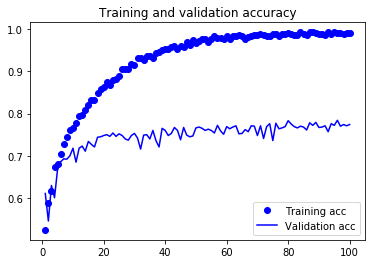

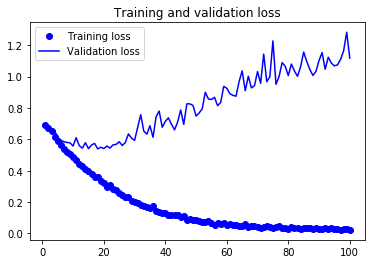

In [18]:
#plot accuracy and loss
acc_vloss(history2)

In [19]:
#Using a pretrained model

from tensorflow.keras.applications import VGG16

#instantiating VGG16 convolutional base with 14.7 mil parameters

convolutional_base = VGG16(weights = 'imagenet',
                            include_top = False,
                            input_shape = (150, 150, 3))

convolutional_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Adding convolutionaal base model to neural network without data augmentation for demo purposes

In [0]:
#extracting features with pretrained model
#recording the convolutional base output to np.array

#datagen = ImageDataGenerator(rescale=1./255)
#batch_size = 20

#def extract_features(directory, sample_count):
  #features = np.zeros(shape=(sample_count, 4, 4, 512))
  #labels = np.zeros(shape=(sample_count))
  #generator = datagen.flow_from_directory(
  #directory,
  #target_size=(150, 150),
  #batch_size=batch_size,
  #class_mode='binary')

  #i = 0

  #for inputs_batch, labels_batch in generator:
    #features_batch = convolutional_base.predict(inputs_batch) #calling predict extracts features
    #features[i * batch_size : (i + 1) * batch_size] = features_batch
    #labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    #i += 1

    #if i * batch_size >= sample_count:
      #break

  #return features, labels

#train_features, train_labels = extract_features(train_dir, 2000)

#validation_features, validation_labels = extract_features(validation_dir, 1000)

#test_features, test_labels = extract_features(test_dir, 1000)

In [0]:
#Defining new model eith Dense layers to compliment VGG16 convolutional base

#RMS = RMSprop(lr = 2e-5)
#def VGG16_base_dense():
  #model = Sequential()

  #model.add(Dense(256, activation = 'relu', input_dim = 4 * 4 * 512))
  #model.add(Dropout(0.5))
  #model.add(Dense(1, activation = 'sigmoid'))

  #model.compile(optimizer = RMS, loss = 'binary_crossentropy', metrics = ['accuracy'])
  #return model

In [0]:
#training third model with VGG16 convolutional base, no data augmentation

#model_three = VGG16_base_dense()

#history3 = history = model_three.fit(train_features, train_labels,
#                               epochs = 30,
#                               batch_size =20,
#                               validation_data =(validation_features, validation_labels))

In [0]:
#acc_vloss()

In [0]:
#model_three.save('cat_dog_mini_three.h5')

#Using a pretrained model with data augmentation

In [26]:

#This method is slower and more expensive but allows data augmentation during training, which is great for smaller datasets
#Adding convolutional base and Dense layers

def convolutional_base_dense_model(model_name = str):
  model_name = Sequential()

  model_name.add(convolutional_base)
  model_name.add(Flatten())
  model_name.add(Dense(256, activation = 'relu'))
  model_name.add(Dense(1, activation = 'sigmoid'))
  return model_name

#Freezing convolutional_base trainable parameters  
convolutional_base.trainable = False


0

In [27]:
train_datagen_aug = create_train_datagen_aug()

test_datagen = create_test_datagen()

train_generator = create_train_generator(20, (150, 150), 'binary')

validation_generator = create_validation_generator(20, (150, 150), 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
model_four = convolutional_base_dense_model('trained_plus')

model_four.compile(optimizer = RMS,
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [30]:
history4 = history(model_four, 100, 30, 50)

Epoch 1/30
100/100 [==============================] - 9s 92ms/step - loss: 0.4118 - accuracy: 0.8110 - val_loss: 0.3671 - val_accuracy: 0.8400
Epoch 2/30
100/100 [==============================] - 9s 93ms/step - loss: 0.2425 - accuracy: 0.9025 - val_loss: 0.2822 - val_accuracy: 0.8820
Epoch 3/30
100/100 [==============================] - 9s 88ms/step - loss: 0.1878 - accuracy: 0.9285 - val_loss: 0.2982 - val_accuracy: 0.8730
Epoch 4/30
100/100 [==============================] - 9s 86ms/step - loss: 0.1475 - accuracy: 0.9485 - val_loss: 0.2406 - val_accuracy: 0.8940
Epoch 5/30
100/100 [==============================] - 9s 89ms/step - loss: 0.1183 - accuracy: 0.9565 - val_loss: 0.2674 - val_accuracy: 0.8980
Epoch 6/30
100/100 [==============================] - 9s 90ms/step - loss: 0.0928 - accuracy: 0.9705 - val_loss: 0.2918 - val_accuracy: 0.8870
Epoch 7/30
100/100 [==============================] - 9s 90ms/step - loss: 0.0796 - accuracy: 0.9720 - val_loss: 0.2577 - val_accuracy: 0.8960

In [0]:
model_four.save('cat_dog_mini_four4.h5')

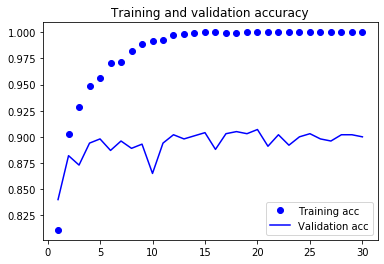

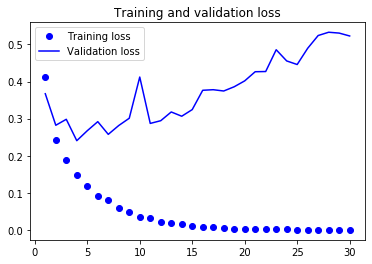

In [32]:
acc_vloss(history4)

#Fine-Tuning

In [33]:
#unfreezing some layers
convolutional_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [34]:
#unfreezing block5_pool & block5_conv1 - 3
convolutional_base.trainable = True

set_trainable = False 

for layer in convolutional_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

len(convolutional_base.trainable_weights)

10

In [35]:
RMS = RMSprop(lr=1e-5)
model_four.compile(loss = 'binary_crossentropy', optimizer = RMS, metrics = ['accuracy'] )

history5 = history(model_four, 100, 100, 50)

Epoch 1/100
100/100 [==============================] - 10s 102ms/step - loss: 2.9860e-04 - accuracy: 1.0000 - val_loss: 0.6317 - val_accuracy: 0.8950
Epoch 2/100
100/100 [==============================] - 10s 100ms/step - loss: 2.5124e-05 - accuracy: 1.0000 - val_loss: 0.6846 - val_accuracy: 0.9020
Epoch 3/100
100/100 [==============================] - 10s 100ms/step - loss: 3.4519e-05 - accuracy: 1.0000 - val_loss: 0.7040 - val_accuracy: 0.9050
Epoch 4/100
100/100 [==============================] - 10s 101ms/step - loss: 1.3733e-05 - accuracy: 1.0000 - val_loss: 0.7111 - val_accuracy: 0.9030
Epoch 5/100
100/100 [==============================] - 10s 101ms/step - loss: 9.2471e-05 - accuracy: 1.0000 - val_loss: 0.6850 - val_accuracy: 0.9100
Epoch 6/100
100/100 [==============================] - 10s 101ms/step - loss: 6.2801e-07 - accuracy: 1.0000 - val_loss: 0.7431 - val_accuracy: 0.9040
Epoch 7/100
100/100 [==============================] - 10s 101ms/step - loss: 1.8174e-06 - accuracy:

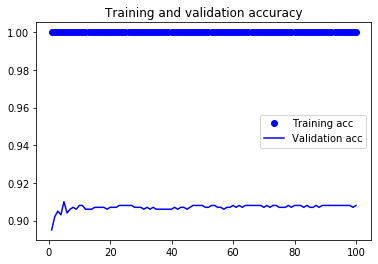

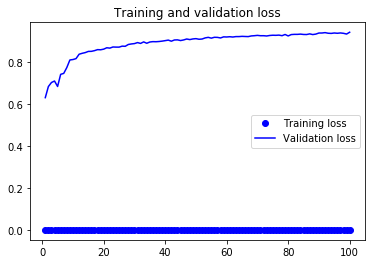

In [36]:
acc_vloss(history5)

In [42]:
#evaluating the final model
def create_test_generator(batch_size = int, target_size = (int, int), class_mode = 'binary'):
  test_generator = test_datagen.flow_from_directory(
  test_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary')
  return test_generator
  
test_loss, test_accuracy = model_four.evaluate(create_test_generator(20, (150, 150), 'binary'), steps = 50)
print('test acc:', test_accuracy)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 3s 58ms/step - loss: 0.8862 - accuracy: 0.9020
test acc: 0.9020000100135803


In [0]:
model_four.save('cat_dog_cnn_final_model5.h5')

In [44]:
model_four.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________
